In [3]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt

In [4]:
podatki = pd.read_csv(os.path.join('C:/Users/Uporabnik/OneDrive/Namizje/SOLA/MAGISTERIJ/MATEMATIKA Z RACUNALNIKOM/GospodinjskiOdjemalci.csv'), sep=';')
podatki["DateTimeStartCET"] = podatki["DateTimeStartCET"].apply(pd.to_datetime)
podatki = podatki.sort_values(by=['DateTimeStartCET'])
podatki

,DateTimeStartUTC,DateTimeStartCET,Odjem ACT,Temperatura ACT,Temperatura FC,Sevanje ACT,Sevanje FC
0,31.10.2021 23:00,2021-01-11 00:00:00,0.000010,3.60,5.300,0.0,0.0
1,31.10.2021 23:15,2021-01-11 00:15:00,0.000009,3.60,5.300,0.0,0.0
2,31.10.2021 23:30,2021-01-11 00:30:00,0.000009,3.60,5.300,0.0,0.0
3,31.10.2021 23:45,2021-01-11 00:45:00,0.000009,3.60,5.300,0.0,0.0
4,1.11.2021 00:00,2021-01-11 01:00:00,0.000008,3.45,5.300,0.0,0.0
...,...,...,...,...,...,...,...
80059,12.02.2024 21:45,2024-12-02 22:45:00,0.000012,8.00,3.375,0.0,0.0
80060,12.02.2024 22:00,2024-12-02 23:00:00,0.000012,7.90,3.200,0.0,0.0
80061,12.02.2024 22:15,2024-12-02 23:15:00,0.000011,7.80,3.300,0.0,0.0
80062,12.02.2024 22:30,2024-12-02 23:30:00,0.000011,7.15,3.400,0.0,0.0


In [5]:
podatki['Year'] = podatki['DateTimeStartCET'].dt.year.astype(int)
podatki['Dan'] = podatki['DateTimeStartCET'].dt.date
podatki = podatki.sort_values(by=['DateTimeStartCET'])

In [6]:
podatki_vsota_po_dnevih = podatki.groupby(['Dan', 'Year']).mean().reset_index()
podatki_vsota_po_dnevih = podatki_vsota_po_dnevih.sort_values(by=['Dan'])

C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_9220\2161900934.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  podatki_vsota_po_dnevih = podatki.groupby(['Dan', 'Year']).mean().reset_index()


Text(0, 0.5, 'Odjem električne energije [kWh]')

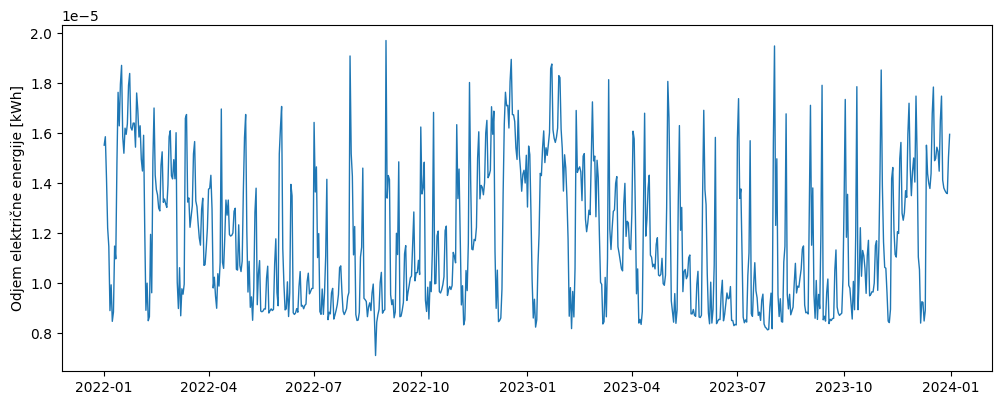

In [7]:
plt.rcParams['figure.figsize'] = [12, 4.5]
podatki_vsota_po_dnevih_2023_naprej = podatki_vsota_po_dnevih.loc[podatki_vsota_po_dnevih['Year'].isin([2022,2023])]
plt.plot(podatki_vsota_po_dnevih_2023_naprej['Dan'], podatki_vsota_po_dnevih_2023_naprej['Odjem ACT'], lw=1)
plt.ylabel('Odjem električne energije [kWh]')


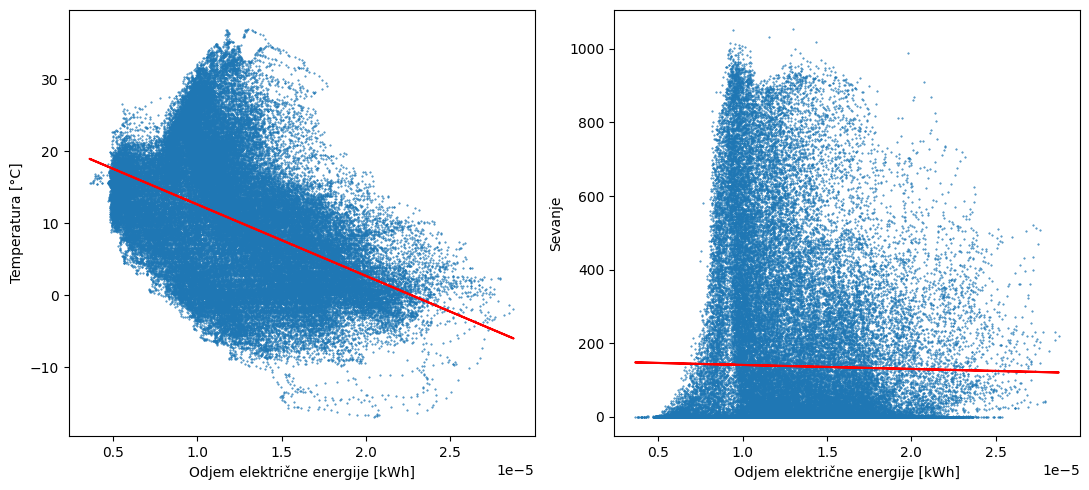

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np

# temperatura
X = np.array(podatki["Odjem ACT"]).reshape(-1, 1)
y = np.array(podatki["Temperatura ACT"])
reg = LinearRegression().fit(X, y)
podatki['predicted'] = reg.predict(X)

# sevanje
X_S = np.array(podatki["Odjem ACT"]).reshape(-1, 1)
y_S = np.array(podatki["Sevanje ACT"])
reg = LinearRegression().fit(X_S, y_S)
podatki['predicted_S'] = reg.predict(X_S)


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11, 5))

ax1 = plt.subplot(1, 2, 1)
podatki.plot.scatter(x = "Odjem ACT", y = "Temperatura ACT", s = 0.2, ax = ax1, legend=False)
podatki.plot.line(x = "Odjem ACT", y = 'predicted', ax = ax1, color="red", legend=False)
plt.xlabel('Odjem električne energije [kWh]')
plt.ylabel('Temperatura [°C]')

ax1 = plt.subplot(1, 2, 2)
podatki.plot.scatter(x = "Odjem ACT", y = "Sevanje ACT", s = 0.2, ax = ax2, legend=False)
podatki.plot.line(x = "Odjem ACT", y = 'predicted_S', ax = ax2, color="red", legend=False)
plt.xlabel('Odjem električne energije [kWh]')
plt.ylabel('Sevanje')

plt.tight_layout()
